In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Network import Place_net, Grid_net, Coupled_Net
import brainpy as bp
import brainpy.math as bm
from matplotlib.animation import FuncAnimation
from scipy.signal import find_peaks
from Functions import *

In [2]:
# Parameters
# grid spacing
lambda_1 = 3
lambda_2 = 4
lambda_3 = 5
Lambda = np.array([lambda_1, lambda_2, lambda_3])
Coding_range = lambda_1 * lambda_2 * lambda_3
# connection range
a_p = 0.3
a_g = a_p/Lambda*2*np.pi
# connection strength
J_p = 20
J_g = J_p
J_pg = J_p/50
# divisive normalization
k_p = 20.
k_g = Lambda/2/np.pi * k_p
# time constants
tau_p = 1.
tau_g = 2*np.pi * tau_p/Lambda
# cell number
num_p = int(1280)*2
rho_p = num_p/Coding_range
rho_g = rho_p
num_g = int(rho_g*2*np.pi) # 为了让两个网络的rho相等

In [3]:
# 生成I_p, I_g
sigma_phi_generate = 0.5
sigma_g_generate = 0.1
sigma_p_generate = 0.1
# input_strength
alpha_p = 0.0
alpha_g = 1.
Ip, Ig = generate_model(z_truth=30, sigma_phi_generate=sigma_phi_generate, 
                        sigma_g_generate=sigma_g_generate, sigma_p_generate=sigma_p_generate,
                        alpha_p=alpha_p, alpha_g=alpha_g, Lambda=Lambda)


# plt.show()

In [4]:
Ag = 1./(4*np.sqrt(np.pi)*a_g*rho_g*k_g)*(rho_g*J_g+np.sqrt((rho_g*J_g)**2-8*np.sqrt(2*np.pi)*a_g*rho_g*k_g))
Ap = 1./(4*np.sqrt(np.pi)*a_p*rho_p*k_p)*(rho_p*J_p+np.sqrt((rho_p*J_p)**2-8*np.sqrt(2*np.pi)*a_p*rho_p*k_p))
Rg = Ag**2/(1+k_g*rho_g*a_g*np.sqrt(2*np.pi)*Ag**2)

sigma_g = np.sqrt(np.sqrt(np.pi)*Ag**3*rho_g*tau_g/(a_g*alpha_g + 1e-8)) 
sigma_phi = 1/((Lambda/2/np.pi) * np.sqrt(J_pg*rho_g*Rg/(4*Ap*tau_p))) 
sigma_p = np.sqrt(np.sqrt(np.pi)*Ap**3*rho_p*tau_p/(a_p*alpha_p + 1e-8)) 

candidate_num = 1000
Energy = Get_energy(sigma_g=sigma_g, sigma_phi=sigma_phi, sigma_p=sigma_p, Ig=Ig, Ip=Ip, candidate_num=candidate_num, Lambda=Lambda, a_g=a_g, a_p=a_p)

global_minimum: 7.387387387387387


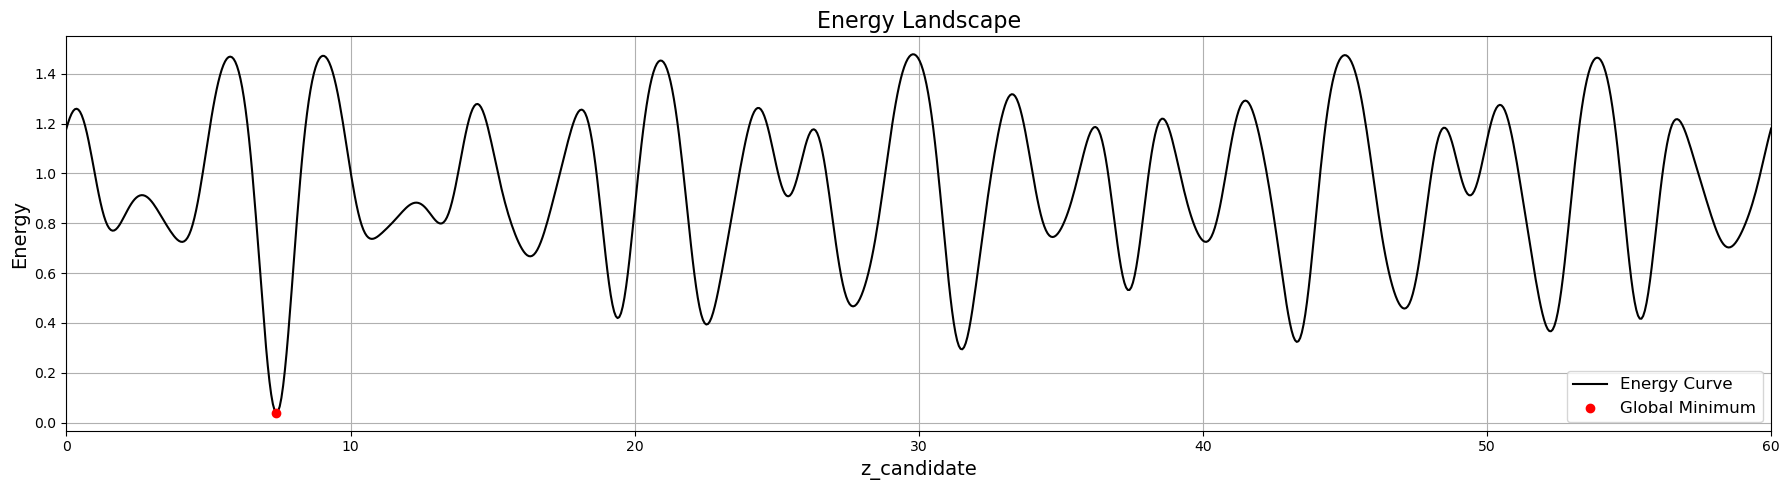

In [5]:
candidate_num = 1000
L = np.prod(Lambda)
z_candidate = np.linspace(0, L , candidate_num)
# 找到局部最小值
peaks, _ = find_peaks(-Energy)
local_minima = peaks

# 找到全局最小值
global_minimum = np.argmin(Energy)
# print('all local minima:', z_candidate[local_minima])
print('global_minimum:', z_candidate[global_minimum])
# 画图
# Energy = Energy-np.min(Energy)
fig = plt.figure(figsize=(18, 5))
plt.plot(z_candidate, Energy, label='Energy Curve', color='black', linewidth=1.5)
# plt.scatter(z_candidate[local_minima], Energy[local_minima], color='blue', label='Local Minima', zorder=5)
plt.scatter(z_candidate[global_minimum], Energy[global_minimum], color='red', label='Global Minimum', zorder=5)
plt.xlabel('z_candidate', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy Landscape', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0, L)
# plt.ylim(0, 1)
plt.tight_layout()

In [6]:
z_MAP = MAP_decoding(sigma_g=sigma_g, sigma_phi=sigma_phi, sigma_p=sigma_p, Ig=Ig, Ip=Ip, candidate_num=candidate_num, Lambda=Lambda, a_g=a_g, a_p=a_p)
print(z_MAP)

7.387387387387387


In [7]:
z_init = 30
z_GOP = GOP_decoding(z_init=z_init, sigma_g=sigma_g, sigma_phi=sigma_phi, sigma_p=sigma_p, Ig=Ig, Ip=Ip, candidate_num=candidate_num, Lambda=Lambda, a_g=a_g, a_p=a_p)
print(z_GOP)

27.68768768768769


In [10]:
u_HPC, u_grid, z_decode, phi_decode, energy = Net_decoding(alpha_p, alpha_g, Ip, Ig, z_init=z_init, 
                                                           Lambda=Lambda, a_p=a_p, a_g = a_g, 
                 num_p = num_p, k_p = k_p, tau_p = tau_p,
                 J_p = J_p, num_g = num_g, k_g=k_g, tau_g=tau_g, J_g=J_g, J_pg=J_pg)
print(z_decode)

60


  0%|          | 0/8000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Variable(value=Array([[30.      ],
                      [30.      ],
                      [30.00004 ],
                      ...,
                      [31.525433],
                      [31.525433],
                      [31.525433]]),
         dtype=float32)


Variable(value=Array([[30.1     ],
                      [30.1     ],
                      [30.100061],
                      ...,
                      [31.525433],
                      [31.525433],
                      [31.525433]]),
         dtype=float32)


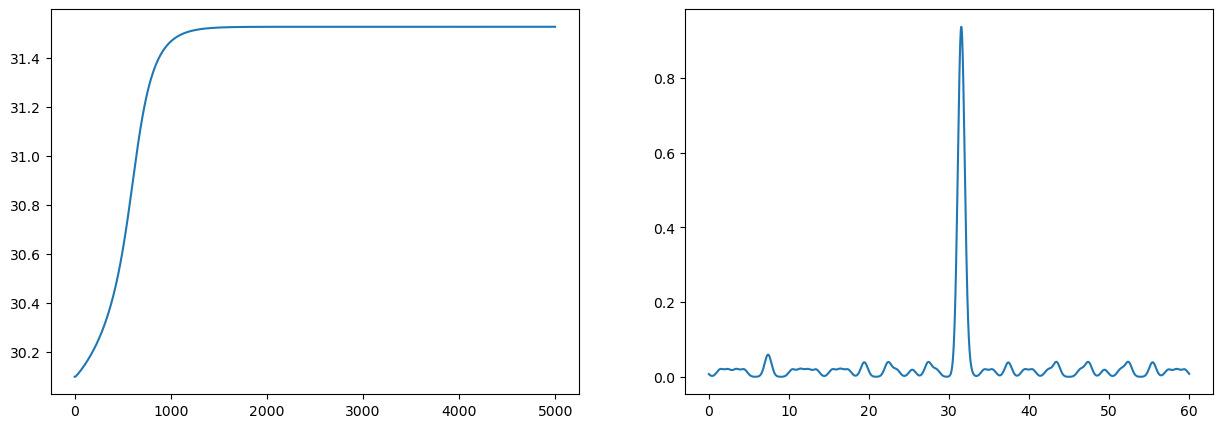

In [9]:
print(z_decode)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(z_decode)

x = np.linspace(0, Coding_range, num_p)
ax[1].plot(x, u_HPC[-1])